In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sklearn
from sklearn import datasets

In [3]:
df = datasets.load_diabetes()

In [4]:
X = df.data
Y = df.target

In [5]:
X.shape, Y.shape

((442, 10), (442,))

In [6]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
df1 = pd.DataFrame(X)
df1.columns = df.feature_names
df1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## Since it will be very difficult to create the model for multiple features so we are going to select only one feature

In [8]:
X__ = X[:,0]

In [9]:
age_x = df1.iloc[:,0:1]

In [10]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(X__,Y, train_size = 0.7)

# Now we are going to build our model

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((309,), (133,), (309,), (133,))

In [12]:
# So the features which we need to have in our model are cost function, goodness of fit score, measurement of coefficients, predicted value

In [13]:
class LinearRegression:
    
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
    # Method to find the coefficients
    
    def find_coefficients(self):
        numerator = ((self.x_train * self.y_train).mean()) - ((self.x_train.mean())*(self.y_train.mean()))
        denominator = (self.x_train**2).mean() - (self.x_train.mean()*self.x_train.mean())
        self.m = numerator/ denominator
        self.c = self.y_train.mean() - (self.m * (self.x_train.mean()))
        return self.c,self.m
        
    # Find the predicted values
    def find_predicted(self,x_x):
        self.predicted = (self.m * x_x) + self.c
        return self.predicted
    def goodness_of_fit(self):
        mean = self.y_test.mean()
        self.fit = 1 - ((((self.y_test- self.predicted)**2).sum())/(((self.y_test - mean)**2).sum()))
        return self.fit

In [14]:
alg1 = LinearRegression(x_train,x_test,y_train,y_test)
print(alg1.find_coefficients())
print(alg1.find_predicted(x_test))
print(alg1.goodness_of_fit())

(151.86234990606866, 415.2125542200304)
[176.72159768 175.21332211 151.08091302 146.55608631 157.11401529
 143.53953517 169.18021984 119.40712608 142.03125961 154.09746415
 158.62229086 176.72159768 155.60573972 148.06436188 140.52298404
 160.13056643 129.96505506 179.73814882 169.18021984 167.67194427
 122.42367721 163.14711756 170.68849541 166.1636687  120.91540165
 140.52298404 132.98160619 131.47333063 134.48988176 155.60573972
 135.99815733 179.73814882 160.13056643 140.52298404 125.44022835
 170.68849541 114.88229937 128.45677949 158.62229086 157.11401529
 119.40712608 129.96505506 178.22987325 157.11401529 160.13056643
 176.72159768 117.89885051 172.19677098 163.14711756 151.08091302
 149.57263745 154.09746415 145.04781074 158.62229086 154.09746415
 154.09746415 152.58918859 146.55608631 158.62229086 164.65539313
 181.24642439 179.73814882 178.22987325 157.11401529 107.34092153
 179.73814882 182.75469996 170.68849541 154.09746415 132.98160619
 179.73814882 149.57263745 161.63884

In [15]:
predicted = alg1.find_predicted(x_train)

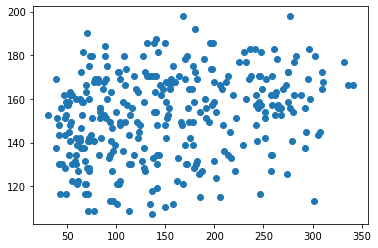

In [16]:
plt.scatter(y_train,predicted)

plt.show()

In [25]:
c, m = alg1.find_coefficients()
c,m

(151.86234990606866, 415.2125542200304)

In [34]:
li = np.arange(-0.1,1,0.005)

In [35]:
li

array([-1.00000000e-01, -9.50000000e-02, -9.00000000e-02, -8.50000000e-02,
       -8.00000000e-02, -7.50000000e-02, -7.00000000e-02, -6.50000000e-02,
       -6.00000000e-02, -5.50000000e-02, -5.00000000e-02, -4.50000000e-02,
       -4.00000000e-02, -3.50000000e-02, -3.00000000e-02, -2.50000000e-02,
       -2.00000000e-02, -1.50000000e-02, -1.00000000e-02, -5.00000000e-03,
        8.32667268e-17,  5.00000000e-03,  1.00000000e-02,  1.50000000e-02,
        2.00000000e-02,  2.50000000e-02,  3.00000000e-02,  3.50000000e-02,
        4.00000000e-02,  4.50000000e-02,  5.00000000e-02,  5.50000000e-02,
        6.00000000e-02,  6.50000000e-02,  7.00000000e-02,  7.50000000e-02,
        8.00000000e-02,  8.50000000e-02,  9.00000000e-02,  9.50000000e-02,
        1.00000000e-01,  1.05000000e-01,  1.10000000e-01,  1.15000000e-01,
        1.20000000e-01,  1.25000000e-01,  1.30000000e-01,  1.35000000e-01,
        1.40000000e-01,  1.45000000e-01,  1.50000000e-01,  1.55000000e-01,
        1.60000000e-01,  

In [42]:
y = 0.1*m*li + c

In [43]:
y

array([147.71022436, 147.91783064, 148.12543692, 148.3330432 ,
       148.54064947, 148.74825575, 148.95586203, 149.1634683 ,
       149.37107458, 149.57868086, 149.78628713, 149.99389341,
       150.20149969, 150.40910597, 150.61671224, 150.82431852,
       151.0319248 , 151.23953107, 151.44713735, 151.65474363,
       151.86234991, 152.06995618, 152.27756246, 152.48516874,
       152.69277501, 152.90038129, 153.10798757, 153.31559385,
       153.52320012, 153.7308064 , 153.93841268, 154.14601895,
       154.35362523, 154.56123151, 154.76883779, 154.97644406,
       155.18405034, 155.39165662, 155.59926289, 155.80686917,
       156.01447545, 156.22208173, 156.429688  , 156.63729428,
       156.84490056, 157.05250683, 157.26011311, 157.46771939,
       157.67532567, 157.88293194, 158.09053822, 158.2981445 ,
       158.50575077, 158.71335705, 158.92096333, 159.1285696 ,
       159.33617588, 159.54378216, 159.75138844, 159.95899471,
       160.16660099, 160.37420727, 160.58181354, 160.78

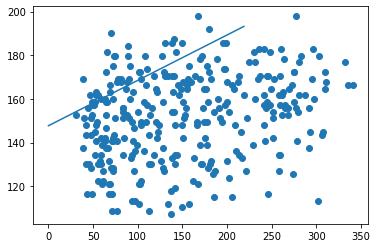

In [44]:
plt.plot(y)
plt.scatter(y_train,predicted)

plt.show()

In [32]:
x_test.min()

-0.107225631607358

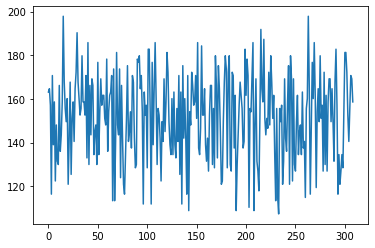

In [27]:
plt.plot(predicted)

In [29]:
predicted.shape

(309,)

In [33]:
x_test


array([ 0.05987114,  0.0562386 , -0.00188202, -0.01277963,  0.01264814,
       -0.02004471,  0.04170844, -0.07816532, -0.02367725,  0.00538306,
        0.01628068,  0.05987114,  0.0090156 , -0.00914709, -0.02730979,
        0.01991321, -0.05273755,  0.06713621,  0.04170844,  0.03807591,
       -0.07090025,  0.02717829,  0.04534098,  0.03444337, -0.07453279,
       -0.02730979, -0.04547248, -0.04910502, -0.04183994,  0.0090156 ,
       -0.0382074 ,  0.06713621,  0.01991321, -0.02730979, -0.06363517,
        0.04534098, -0.08906294, -0.05637009,  0.01628068,  0.01264814,
       -0.07816532, -0.05273755,  0.06350368,  0.01264814,  0.01991321,
        0.05987114, -0.08179786,  0.04897352,  0.02717829, -0.00188202,
       -0.00551455,  0.00538306, -0.01641217,  0.01628068,  0.00538306,
        0.00538306,  0.00175052, -0.01277963,  0.01628068,  0.03081083,
        0.07076875,  0.06713621,  0.06350368,  0.01264814, -0.10722563,
        0.06713621,  0.07440129,  0.04534098,  0.00538306, -0.04